In [135]:
#Importing The Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go

In [136]:
#Loading the data
f=pd.read_csv("Data1.csv")

In [137]:
#Getting specific Rows to work on
f=f[['ID','Year','Mortality Rate']]
Data1=f.iloc[0:63]
Data1.head()

,ID,Year,Mortality Rate
0,2,1967,2.812874
1,3,1968,2.753663
2,4,1969,2.694331
3,5,1966,2.869456
4,6,1970,2.632806


In [138]:
#Checking if their is some unsuable row
print(Data1.isna().sum())

ID                0
Year              0
Mortality Rate    0
dtype: int64


In [139]:
#Getting the number of rows and column
Data1.shape

(62, 3)

In [140]:
Data1.describe()

,ID,Year,Mortality Rate
count,62.000000,62.000000,62.000000
mean,32.500000,1988.500000,1.454327
std,18.041619,18.041619,1.045555
min,2.000000,1958.000000,0.106644
25%,17.250000,1973.250000,0.498804
50%,32.500000,1988.500000,1.260256
75%,47.750000,2003.750000,2.407652
max,63.000000,2019.000000,3.358495


In [141]:
#Dividing data into independent and dependent varible
x=np.array(Data1['Year']).reshape(-1,1)
y=np.array(Data1['Mortality Rate']).reshape(-1,1)


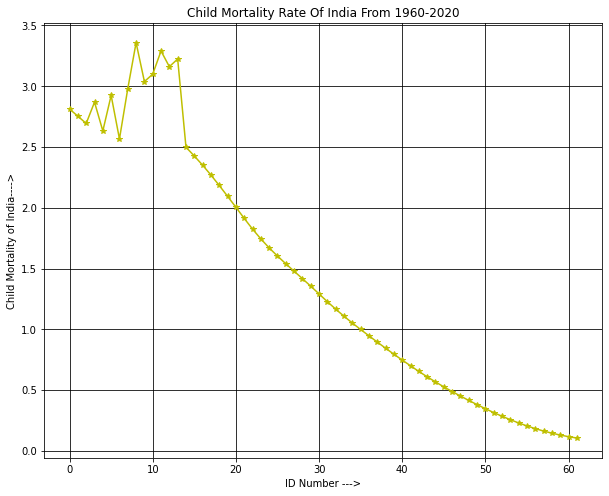

In [142]:
#Plotting the Graph using matplotlib
from matplotlib import rcParams
rcParams['figure.figsize']=10,8
plt.plot(y,'-y*');
plt.grid(True,color='k');
plt.title("Child Mortality Rate Of India From 1960-2020")
plt.ylabel("Child Mortality of India---->")
plt.xlabel("ID Number --->");

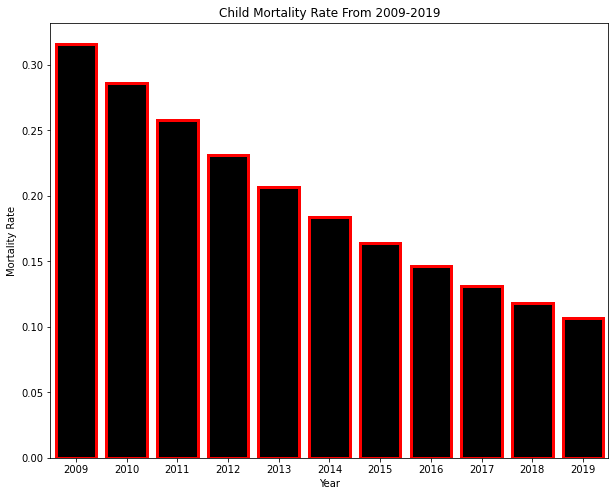

In [143]:
#Bar Graph of Mortality From 2009-2019
j=Data1.iloc[51:63]
sns.barplot(x='Year',y='Mortality Rate',data=j,ci=None,color='black',edgecolor='red',lw=3).set(title='Child Mortality Rate From 2009-2019');

In [144]:
# Getting the square of ID for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=3)
x = poly.fit_transform(x)
#print(x)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy= model.score(x,y)
print('Accuracy Of Linear Regression is :',round(accuracy*100,3))

Accuracy Of Linear Regression is : 99.905


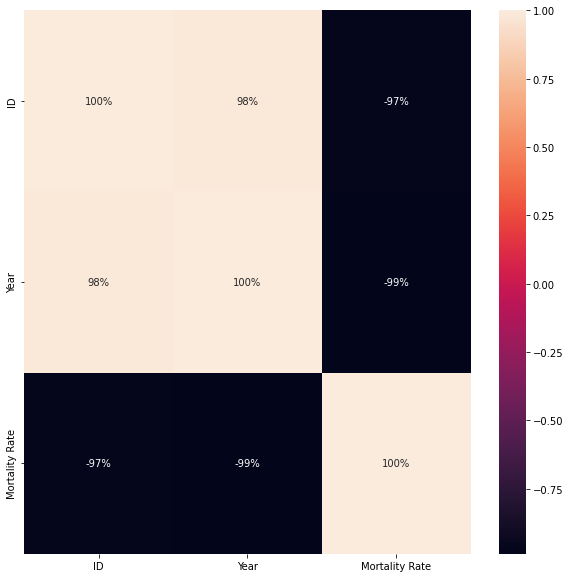

In [145]:
#Visualize the data correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(f.corr(),annot=True,fmt=".0%");

In [146]:
#Actual Values
print("Actual Values :")
print(y.ravel())
#Predicted Values
print("Predicted Values :")
pred=model.predict(x)
print(pred.ravel())

Actual Values :
[2.81287352 2.75366304 2.69433108 2.86945563 2.63280595 2.92505663
 2.56668618 2.98052275 3.35849535 3.03872849 3.09979898 3.29013061
 3.16125262 3.22432249 2.4987848  2.42653575 2.35100181 2.27000548
 2.18404061 2.09514812 2.00522303 1.91350205 1.82543075 1.74483391
 1.67067743 1.60385582 1.54024327 1.47894459 1.41782804 1.3557256
 1.29215658 1.22835544 1.16702039 1.10855347 1.05277094 0.99957962
 0.94748971 0.89614043 0.84555108 0.7962004  0.74805422 0.70091063
 0.65465172 0.61023529 0.56814345 0.52783066 0.48912847 0.45210658
 0.41617392 0.38154867 0.34805907 0.31616466 0.2859867  0.25751988
 0.23083391 0.20637907 0.18408834 0.16428394 0.14663682 0.13120419
 0.11795506 0.10664381]
Predicted Values :
[2.7874754  2.71792229 2.64789474 2.85648137 2.57746544 2.92486751
 2.5067071  2.99256111 3.38010855 3.05948949 3.12557995 3.31809677
 3.19075977 3.25495628 2.43569242 2.36449408 2.29318479 2.22183725
 2.15052414 2.07931817 2.00829204 1.93751844 1.86707008 1.79701963
 1.7

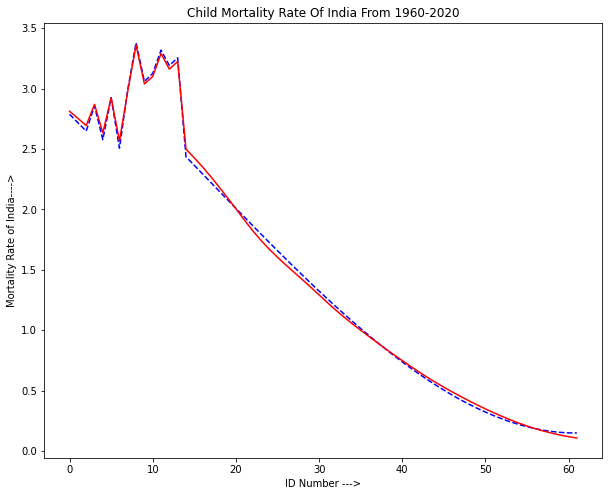

In [147]:
#Plot between Actual and Predicted Data
y0=model.predict(x)
plt.plot(y0,'--b')
plt.plot(y,'-r');
plt.title("Child Mortality Rate Of India From 1960-2020")
plt.ylabel("Mortality Rate of India---->")
plt.xlabel("ID Number --->");

In [148]:
#Prediction
years=3
print(f'Prediction -Morality Rate in {2019+years} will be:',end=' ')
print(model.predict(poly.fit_transform([[2019+years]])))

Prediction -Morality Rate in 2022 will be: [[0.16472406]]


In [149]:
#dumping a data
from joblib import dump
dump(model,"Child Mortality Prediction-India.joblib")

['Child Mortality Prediction-India.joblib']